Final Anaylsis for Group 10


*Kenneth's Final Anaylsis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from pandas.tseries.offsets import MonthEnd
pd.set_option('display.max_rows', None)

In [2]:
# import csv's
clean_county_pop = pd.read_csv('../CleanCSV/Clean_County_Population.csv')
total_case_count = pd.read_csv('../CleanCSV/Total_Case_Count.csv')

In [3]:
clean_county_pop.head()

,Unnamed: 0,County,Population 2020,GrowthRate
0,0,Alameda,1684000,11.2991
1,1,Alpine,1061,-8.6133
2,2,Amador,41047,8.3492
3,3,Butte,235354,7.0058
4,4,Calaveras,45522,0.1188


In [4]:
total_case_count.head()

,County,Month,TotalCountConfirmed,TotalCountDeaths,Date
0,Alameda,March,269.0,7.0,2020-03-31
1,Alameda,April,1599.0,63.0,2020-04-30
2,Alameda,May,3362.0,104.0,2020-05-31
3,Alameda,June,6067.0,135.0,2020-06-30
4,Alameda,July,11441.0,182.0,2020-07-31


In [5]:
# grabs most recent monthly total of confirmed cases per county
final_infected = []
counter = 0
for i in total_case_count['TotalCountConfirmed']:
    if counter == 7:
        final_infected.append(i)
        counter = 0
    else:
        counter = counter + 1
final_infected

[22546.0,
 3.0,
 313.0,
 3019.0,
 267.0,
 544.0,
 18120.0,
 167.0,
 1283.0,
 30051.0,
 634.0,
 540.0,
 11987.0,
 215.0,
 32799.0,
 8159.0,
 670.0,
 757.0,
 286187.0,
 4770.0,
 6969.0,
 77.0,
 988.0,
 9292.0,
 12.0,
 43.0,
 9.0,
 15.0,
 506.0,
 49.0,
 1.0,
 284.0,
 271.0,
 14.0,
 193.0,
 736.0,
 404.0,
 122.0,
 67.0,
 297.0,
 89.0,
 777.0,
 40.0,
 5.0,
 0.0,
 3.0,
 56.0,
 58.0,
 28.0,
 8.0,
 0.0,
 0.0,
 42.0,
 1.0,
 69.0,
 143.0,
 21.0,
 5.0]

In [6]:
# calculates percent of total cases based off total population per county
percent_infected = final_infected / clean_county_pop['Population 2020']
percent_infected

0     0.013388
1     0.002828
2     0.007625
3     0.012827
4     0.005865
5     0.025266
6     0.015608
7     0.005833
8     0.006593
9     0.029750
10    0.022459
11    0.003969
12    0.065742
13    0.011901
14    0.035951
15    0.052739
16    0.010336
17    0.025099
18    0.028394
19    0.029589
20    0.026851
21    0.004390
22    0.011301
23    0.032995
24    0.001390
25    0.003011
26    0.000021
27    0.000109
28    0.005056
29    0.000015
30    0.000002
31    0.015001
32    0.000108
33    0.000009
34    0.003006
35    0.000333
36    0.000120
37    0.000137
38    0.000087
39    0.001037
40    0.000115
41    0.001733
42    0.000021
43    0.000018
44    0.000000
45    0.001019
46    0.001284
47    0.000128
48    0.000057
49    0.000014
50    0.000000
51    0.000000
52    0.003456
53    0.000002
54    0.001242
55    0.000168
56    0.000094
57    0.000062
Name: Population 2020, dtype: float64

In [7]:
# creates quartiles based off all county populations
quartiles = clean_county_pop['Population 2020'].quantile([.25,.5,.75])
quartiles

0.25     48026.25
0.50    188461.50
0.75    717992.00
Name: Population 2020, dtype: float64

In [8]:
# places counties in their respective quartiles based off their population count
bins = [0, 48027, 188462, 717993, 10079001]
population_groups = ['Quartile 1', 'Quartile 2', 'Quartile 3', 'Quartile 4']

clean_county_pop['Population Quartiles'] = pd.cut(clean_county_pop['Population 2020'], bins, labels=population_groups)
clean_county_pop = clean_county_pop.sort_values(by=['Population Quartiles'], ascending = False)
clean_county_pop.head()

,Unnamed: 0,County,Population 2020,GrowthRate,Population Quartiles
0,0,Alameda,1684000,11.2991,Quartile 4
14,14,Kern,912316,8.4706,Quartile 4
55,55,Ventura,851297,3.1713,Quartile 4
42,42,Santa Clara,1945940,8.9503,Quartile 4
40,40,San Mateo,771019,7.1269,Quartile 4


In [9]:
#drops Unnamed: 0 and GrowthRate series
clean_county_pop = clean_county_pop.drop(columns= ['Unnamed: 0', 'GrowthRate'])
clean_county_pop = clean_county_pop.sort_values(by='County', ascending=True)

# adds total case count series and percent total case count of population series to df
clean_county_pop['Total Cases'] = final_infected
clean_county_pop['Total Cases(%)'] = percent_infected
clean_county_pop.head()

,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,Alpine,1061,Quartile 1,3.0,0.002828
2,Amador,41047,Quartile 1,313.0,0.007625
3,Butte,235354,Quartile 3,3019.0,0.012827
4,Calaveras,45522,Quartile 1,267.0,0.005865


In [10]:
# calculates average stats per quartile
quartile_avg_stats = clean_county_pop.groupby('Population Quartiles').mean()
quartile_avg_stats['Total Cases(%)'] = quartile_avg_stats['Total Cases(%)'].multiply(100)
quartile_avg_stats

,Population 2020,Total Cases,Total Cases(%)
Population Quartiles,,,
Quartile 1,2.215527e+04,227.800000,0.909530
Quartile 2,1.119531e+05,1993.000000,1.308222
Quartile 3,3.587651e+05,1554.857143,0.588381
Quartile 4,2.196668e+06,26109.200000,0.828030


In [11]:
# sets x axis and tick locations
x_axis = np.arange(len(clean_county_pop['Population Quartiles'].unique()))
tick_locations = [value for value in x_axis]
quartile_list = clean_county_pop['Population Quartiles'].unique()

Text(0, 0.5, 'Avg Total Cases(%)')

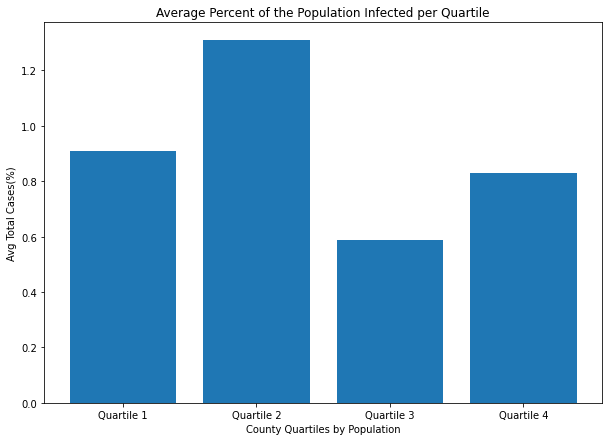

In [12]:
# plots bar chart
plt.figure(figsize=(10,7))
plt.bar(x_axis, quartile_avg_stats['Total Cases(%)'])
plt.xticks(tick_locations, sorted(quartile_list), rotation="horizontal")

plt.title('Average Percent of the Population Infected per Quartile')
plt.xlabel('County Quartiles by Population')
plt.ylabel('Avg Total Cases(%)')

In [14]:
# merges both df for a summary df by county
county_summary_df = pd.merge(clean_county_pop, total_case_count, on='County')
county_summary_df.head()

,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%),Month,TotalCountConfirmed,TotalCountDeaths,Date
0,Alameda,1684000,Quartile 4,22546.0,0.013388,March,269.0,7.0,2020-03-31
1,Alameda,1684000,Quartile 4,22546.0,0.013388,April,1599.0,63.0,2020-04-30
2,Alameda,1684000,Quartile 4,22546.0,0.013388,May,3362.0,104.0,2020-05-31
3,Alameda,1684000,Quartile 4,22546.0,0.013388,June,6067.0,135.0,2020-06-30
4,Alameda,1684000,Quartile 4,22546.0,0.013388,July,11441.0,182.0,2020-07-31


In [15]:
# drops columns
county_summary_df = county_summary_df.drop(columns = ['Total Cases', 'Total Cases(%)', 'TotalCountDeaths'])

# calculates percent of total cases to county population per month
county_summary_df['Total Cases(%)'] = county_summary_df['TotalCountConfirmed'] / county_summary_df['Population 2020']
county_summary_df.to_csv('County_Summary_Df.csv')
county_summary_df.head()

,County,Population 2020,Population Quartiles,Month,TotalCountConfirmed,Date,Total Cases(%)
0,Alameda,1684000,Quartile 4,March,269.0,2020-03-31,0.000160
1,Alameda,1684000,Quartile 4,April,1599.0,2020-04-30,0.000950
2,Alameda,1684000,Quartile 4,May,3362.0,2020-05-31,0.001996
3,Alameda,1684000,Quartile 4,June,6067.0,2020-06-30,0.003603
4,Alameda,1684000,Quartile 4,July,11441.0,2020-07-31,0.006794


In [16]:
# calculates average monthly percent total cases per quartile
quartile_monthly_avg = county_summary_df.groupby(['Population Quartiles', county_summary_df['Month']]).mean()
quartile_monthly_avg = quartile_monthly_avg.reindex(['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'], level=1)
quartile_monthly_avg = quartile_monthly_avg.drop(columns= ['Population 2020', 'TotalCountConfirmed'])
quartile_monthly_avg = quartile_monthly_avg.reset_index()
quartile_monthly_avg['Total Cases(%)'] = quartile_monthly_avg['Total Cases(%)'].multiply(100)
quartile_monthly_avg.head()

,Population Quartiles,Month,Total Cases(%)
0,Quartile 1,March,0.018249
1,Quartile 1,April,0.034424
2,Quartile 1,May,0.061232
3,Quartile 1,June,0.161845
4,Quartile 1,July,0.458457


In [17]:
# separates quartile_monthly_avg into individual dfs for each quartile
quartile1 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 1'])]
quartile2 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 2'])]
quartile3 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 3'])]
quartile4 = quartile_monthly_avg[quartile_monthly_avg['Population Quartiles'].isin(['Quartile 4'])]
quartile4

,Population Quartiles,Month,Total Cases(%)
24,Quartile 4,March,0.020612
25,Quartile 4,April,0.108815
26,Quartile 4,May,0.220612
27,Quartile 4,June,0.471292
28,Quartile 4,July,1.117423
29,Quartile 4,August,1.660644
30,Quartile 4,September,1.914675
31,Quartile 4,October,2.040383


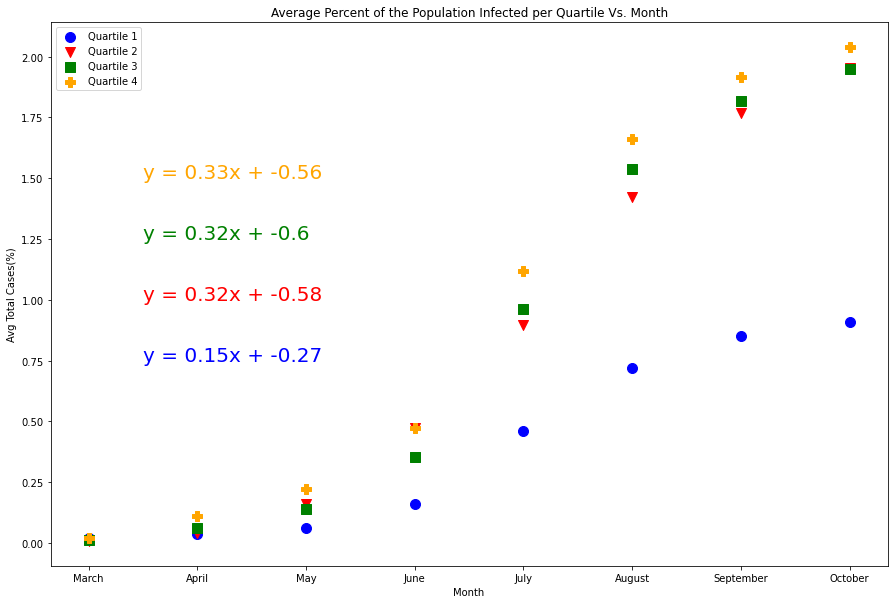

In [18]:
# plots scatter plot for each quartile
fig, axes = plt.subplots(figsize=(15,10))
plt.scatter(quartile1['Month'], quartile1['Total Cases(%)'], s=100, marker='o', c='blue')
plt.scatter(quartile2['Month'], quartile2['Total Cases(%)'], s=100, marker='v', c='red')
plt.scatter(quartile3['Month'], quartile3['Total Cases(%)'], s=100, marker='s', c='green')
plt.scatter(quartile4['Month'], quartile4['Total Cases(%)'], s=100, marker='P', c='orange')

# calculates linregress for each quartile
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile1['Total Cases(%)'])
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile2['Total Cases(%)'])
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile3['Total Cases(%)'])
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress([1, 2, 3, 4, 5, 6, 7, 8], quartile4['Total Cases(%)'])

# calculates line equation for each quartile 
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.annotate(line_eq1,(0.5,0.75),fontsize=20,color="blue")

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.annotate(line_eq2,(0.5,1),fontsize=20,color="red")

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
plt.annotate(line_eq3,(0.5,1.25),fontsize=20,color="green")

line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))
plt.annotate(line_eq4,(0.5,1.5),fontsize=20,color="orange")

# sets axes labels and legend
plt.title('Average Percent of the Population Infected per Quartile Vs. Month')
plt.xlabel('Month')
plt.ylabel('Avg Total Cases(%)')
axes.legend(["Quartile 1", "Quartile 2", 'Quartile 3', 'Quartile 4'])

*Alex Final Analysis

In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('classic')

In [20]:
#locating the clean csv files to use
icu_plot ="../CleanCSV/clean_hospitals_by_count.csv"
county_plot = "../CleanCSV/County_Summary.csv"

In [22]:
#reading the csv file
icu_df = pd.read_csv(icu_plot)
county_df = pd.read_csv(county_plot)

#cleaning up county summary data
county_df['County'] = county_df['County'].str.rstrip()
#for i in icu_df['County']:
    #print(f'The length of {i} is {len(i)}.')
#combine the two data sets
relavent_df = pd.merge(icu_df, county_df, on="County", how="left")
#display the new data
relavent_df.head()


,County,Date,Date.1,Confirmed Covid Patients,Suspected Covid Patinets,Confirmed Covid ICU Patients,ICU suspected COVID Patients,ICU Beds Available,Unnamed: 0,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,Alameda,April,2020-04-30,93.0,106.0,46.0,26.0,197.0,0,1684000,Quartile 4,22546.0,0.013388
1,Alameda,August,2020-08-31,207.0,56.0,73.0,20.0,99.0,0,1684000,Quartile 4,22546.0,0.013388
2,Alameda,July,2020-07-31,213.0,82.0,65.0,13.0,151.0,0,1684000,Quartile 4,22546.0,0.013388
3,Alameda,June,2020-06-30,116.0,92.0,43.0,20.0,203.0,0,1684000,Quartile 4,22546.0,0.013388
4,Alameda,March,2020-03-31,59.0,94.0,27.0,18.0,146.0,0,1684000,Quartile 4,22546.0,0.013388


In [23]:
#Droping uneeded columns and keeping quartiles
quart_df = relavent_df.drop(columns= ['ICU suspected COVID Patients','Confirmed Covid Patients', 'Suspected Covid Patinets','Unnamed: 0', 
                                      'Population 2020', 'Total Cases','Total Cases(%)','Date.1'])
#Renaming Date to month
quartile_df = quart_df.rename(columns={"Date": "Month"})
quartile_df.head()


,County,Month,Confirmed Covid ICU Patients,ICU Beds Available,Population Quartiles
0,Alameda,April,46.0,197.0,Quartile 4
1,Alameda,August,73.0,99.0,Quartile 4
2,Alameda,July,65.0,151.0,Quartile 4
3,Alameda,June,43.0,203.0,Quartile 4
4,Alameda,March,27.0,146.0,Quartile 4


In [24]:
# calculates percent of ICU Covid cases to ICU beds available
quartile_df['Bed Occupied Covid(%)'] = quartile_df['Confirmed Covid ICU Patients'] / quartile_df['ICU Beds Available']
quartile_df.head()

,County,Month,Confirmed Covid ICU Patients,ICU Beds Available,Population Quartiles,Bed Occupied Covid(%)
0,Alameda,April,46.0,197.0,Quartile 4,0.233503
1,Alameda,August,73.0,99.0,Quartile 4,0.737374
2,Alameda,July,65.0,151.0,Quartile 4,0.430464
3,Alameda,June,43.0,203.0,Quartile 4,0.211823
4,Alameda,March,27.0,146.0,Quartile 4,0.184932


In [25]:
# calculates average monthly percent total cases per quartile
icu_avg = quartile_df.groupby(['Population Quartiles', quartile_df['Month']]).mean()
icu_avg = icu_avg.reindex(['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'], level=1)
icu_avg = icu_avg.drop(columns= ['Confirmed Covid ICU Patients', 'ICU Beds Available'])
icu_avg = icu_avg.reset_index()
icu_avg['Bed Occupied Covid(%)'] = icu_avg['Bed Occupied Covid(%)'].multiply(100)
icu_avg.head()

,Population Quartiles,Month,Bed Occupied Covid(%)
0,Quartile 1,March,0.000000
1,Quartile 1,April,4.761905
2,Quartile 1,May,3.571429
3,Quartile 1,June,9.523810
4,Quartile 1,July,20.146520


In [26]:
# separates quartile_monthly_avg into individual dfs for each quartile
quartile1 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 1'])]
quartile2 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 2'])]
quartile3 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 3'])]
quartile4 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 4'])]
quartile4

,Population Quartiles,Month,Bed Occupied Covid(%)
24,Quartile 4,March,34.778430
25,Quartile 4,April,29.304759
26,Quartile 4,May,27.733564
27,Quartile 4,June,37.611448
28,Quartile 4,July,60.862778
29,Quartile 4,August,87.399491
30,Quartile 4,September,49.253480
31,Quartile 4,October,27.317559


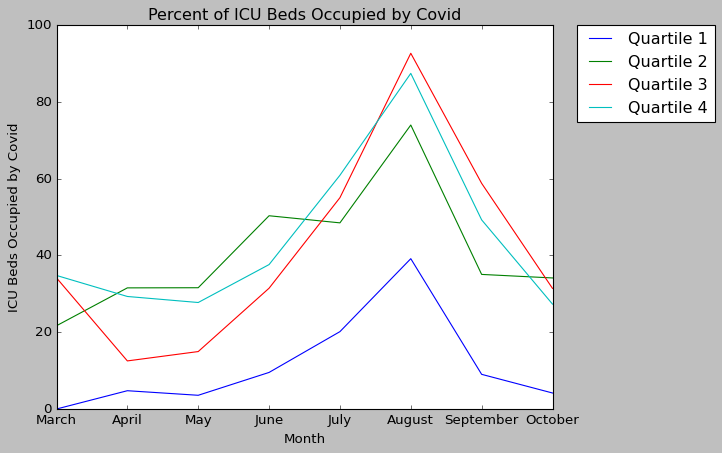

In [27]:
# Generate a line  to show the percent of Beds being Occupied by Covid Patients per Quartile
plt.plot(quartile1["Month"], quartile1["Bed Occupied Covid(%)"], label='Quartile 1')
plt.plot(quartile2["Month"], quartile2["Bed Occupied Covid(%)"], label='Quartile 2')
plt.plot(quartile3["Month"], quartile3["Bed Occupied Covid(%)"], label='Quartile 3')
plt.plot(quartile4["Month"], quartile4["Bed Occupied Covid(%)"], label='Quartile 4')
plt.title("Percent of ICU Beds Occupied by Covid")
plt.xlabel("Month")
plt.ylabel("ICU Beds Occupied by Covid")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [28]:
#saving the graph as a png
plt.savefig("../PNG/Percent of ICU Beds Occupied by Covid")

<Figure size 640x480 with 0 Axes>

*Pheobes Final Anaylsis

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [32]:
#input clean csv
header_list = ["Month","County","Rooms_mean","Rooms_Occupied_mean",]
homeless = pd.read_csv("../CleanCSV/Homeless.csv",names=header_list)
county = pd.read_csv("../CleanCSV/County_Summary.csv")
county.head(50)


,Unnamed: 0,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,1,Alpine,1061,Quartile 1,3.0,0.002828
2,2,Amador,41047,Quartile 1,313.0,0.007625
3,3,Butte,235354,Quartile 3,3019.0,0.012827
4,4,Calaveras,45522,Quartile 1,267.0,0.005865
5,5,Colusa,21531,Quartile 1,544.0,0.025266
6,6,Contra Costa,1160920,Quartile 4,18120.0,0.015608
7,7,Del Norte,28628,Quartile 1,167.0,0.005833
8,8,El Dorado,194590,Quartile 3,1283.0,0.006593
9,9,Fresno,1010120,Quartile 4,30051.0,0.029750


In [33]:
#clean up county name
county['County'] = county['County'].str.rstrip()

county.head()

,Unnamed: 0,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,1,Alpine,1061,Quartile 1,3.0,0.002828
2,2,Amador,41047,Quartile 1,313.0,0.007625
3,3,Butte,235354,Quartile 3,3019.0,0.012827
4,4,Calaveras,45522,Quartile 1,267.0,0.005865


In [34]:
homeless.head()

,Month,County,Rooms_mean,Rooms_Occupied_mean
0,4,Alameda,395.588235,305.352941
1,4,Butte,86.058824,86.058824
2,4,Calaveras,48.533333,22.000000
3,4,Contra Costa,379.000000,165.625000
4,4,Fresno,305.000000,250.000000


In [35]:
#Merge county and homeless_rooms

homeless_room = pd.merge(homeless,county,on="County",how="inner")
homeless_room['Room_Occupied_Pct'] = homeless_room['Rooms_Occupied_mean']/homeless_room['Rooms_mean']
homeless_room.head()

,Month,County,Rooms_mean,Rooms_Occupied_mean,Unnamed: 0,Population 2020,Population Quartiles,Total Cases,Total Cases(%),Room_Occupied_Pct
0,4,Alameda,395.588235,305.352941,0,1684000,Quartile 4,22546.0,0.013388,0.771896
1,5,Alameda,503.965517,369.689655,0,1684000,Quartile 4,22546.0,0.013388,0.733561
2,6,Alameda,624.954545,432.318182,0,1684000,Quartile 4,22546.0,0.013388,0.691759
3,7,Alameda,664.478261,501.043478,0,1684000,Quartile 4,22546.0,0.013388,0.754040
4,8,Alameda,862.400000,572.800000,0,1684000,Quartile 4,22546.0,0.013388,0.664193


In [36]:
#group by Population Quartiles
homeless_room_quartile = homeless_room.groupby(['Population Quartiles','Month'],as_index=False).agg({'Rooms_mean': ['mean'],'Room_Occupied_Pct': ['mean']})

homeless_room_quartile.columns = homeless_room_quartile.columns.droplevel(1)
homeless_room_quartile.head()

,Population Quartiles,Month,Rooms_mean,Room_Occupied_Pct
0,Quartile 1,4,35.177778,0.583606
1,Quartile 1,5,32.800000,0.641052
2,Quartile 1,6,34.878788,0.778737
3,Quartile 1,7,29.369565,0.847025
4,Quartile 1,8,33.883333,0.616325


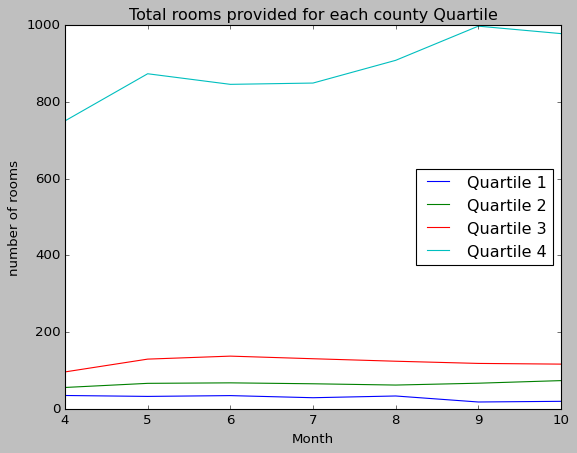

In [37]:

homeless_room_quartile.set_index('Month',inplace=True)
homeless_room_quartile.groupby('Population Quartiles')['Rooms_mean'].plot(legend = True)
plt.legend(loc="best")
plt.title('Total rooms provided for each county Quartile')
plt.ylabel('number of rooms')
plt.savefig("../PNG/Homeless_rooms.png")
plt.show()


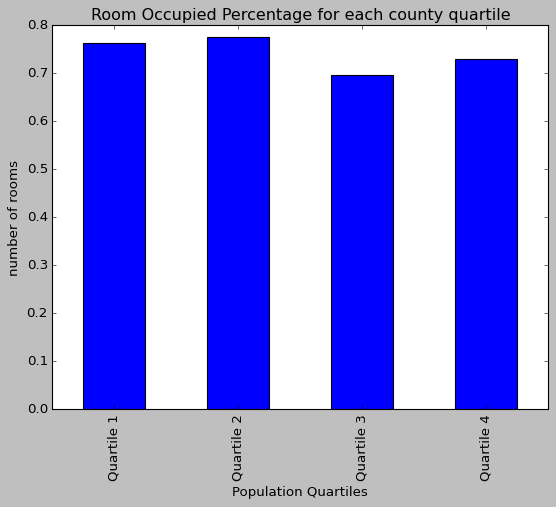

In [38]:

homeless_room_df = homeless_room_quartile.groupby('Population Quartiles')['Room_Occupied_Pct'].mean()

homeless_room_df.plot(kind='bar',legend = False)
plt.title('Room Occupied Percentage for each county quartile')
plt.ylabel('number of rooms')
plt.savefig("../PNG/Homeless_Percentage.png")

plt.show()

*Sam's Final Analysis

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
county_analysis = pd.read_csv('../CleanCSV/Unemployment_count_groupby_Area_Name.csv')
county_analysis.head()

,Area_Name,Date,Date.1,Year,Month,Employment,Unemployment,Unemployment_Rate
0,Acton CDP,March,2020-03-01,2020,March,3400,200,0.049
1,Acton CDP,April,2020-04-01,2020,April,2700,500,0.159
2,Acton CDP,May,2020-05-01,2020,May,2700,500,0.163
3,Acton CDP,June,2020-06-01,2020,June,2800,500,0.153
4,Acton CDP,July,2020-07-01,2020,July,2900,500,0.144


In [44]:
county_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area_Name          7320 non-null   object 
 1   Date               7320 non-null   object 
 2   Date.1             7320 non-null   object 
 3   Year               7320 non-null   int64  
 4   Month              7320 non-null   object 
 5   Employment         7320 non-null   int64  
 6   Unemployment       7320 non-null   int64  
 7   Unemployment_Rate  7320 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 457.6+ KB


In [45]:
county_analysis.columns

Index(['Area_Name', 'Date', 'Date.1', 'Year', 'Month', 'Employment',
       'Unemployment', 'Unemployment_Rate'],
      dtype='object')

In [47]:
county_analysis = round(county_analysis.groupby(['Area_Name','Month']).mean(),2)

In [48]:
county_analysis = round(county_analysis.groupby(['Month']).mean(),2)
county_analysis = county_analysis.reindex(['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'])
county_analysis = county_analysis.reset_index()
county_analysis

,Month,Year,Employment,Unemployment,Unemployment_Rate
0,March,2020.0,88050.33,5205.17,0.08
1,April,2020.0,75558.45,14603.79,0.16
2,May,2020.0,75285.62,14493.00,0.16
3,June,2020.0,78363.27,13796.29,0.15
4,July,2020.0,79235.70,12628.70,0.13
5,August,2020.0,80527.91,10276.86,0.11
6,September,2020.0,64067.95,7810.53,0.10
7,October,NaN,NaN,NaN,NaN


/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Employment'>

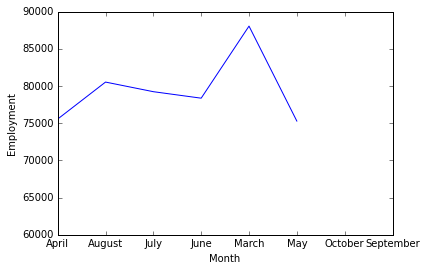

In [49]:
employment_over_time = pd.DataFrame(county_analysis.groupby(['Month']).mean()
                                    .drop(['Unemployment', 'Unemployment_Rate'],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Employment'])

/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Unemployment'>

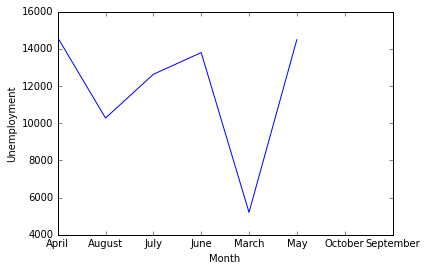

In [50]:
employment_over_time = pd.DataFrame(county_analysis.groupby(['Month']).mean()
                                    .drop(['Employment', 'Unemployment_Rate'],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment'])

/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Unemployment_Rate'>

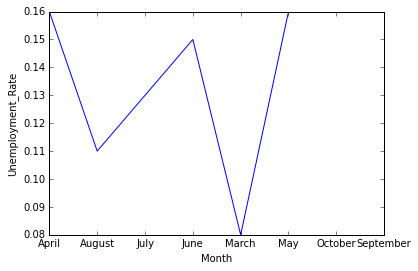

In [51]:
employment_over_time = pd.DataFrame(county_analysis.groupby(['Month']).mean()
                                    .drop(['Employment', 'Unemployment'],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment_Rate'])

/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Employment'>

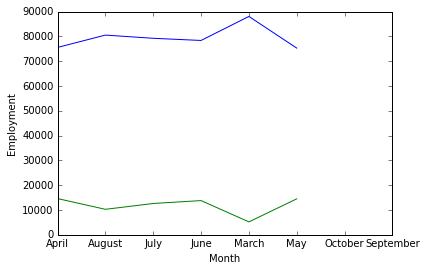

In [52]:
employment_over_time = pd.DataFrame(county_analysis.groupby(['Month']).mean()
                                    .drop(['Unemployment_Rate'],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Employment'])
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment'])

/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Unemployment'>

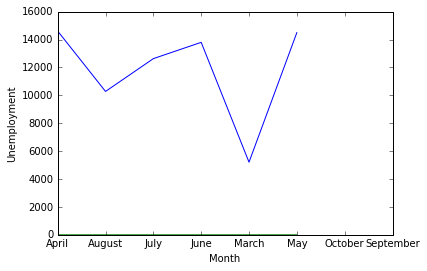

In [53]:
employment_over_time = pd.DataFrame(county_analysis.groupby(['Month']).mean()
                                    .drop(['Employment'],axis=1))
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment'])
sns.lineplot(employment_over_time.index, employment_over_time['Unemployment_Rate'])

*Kevin's Finaly Analysis